In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_BRFSS = pd.read_csv("../Data/BRFSS_preprocessed.csv")

In [117]:
df_BRFSS.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0


In [118]:
print('Total Records:', df_BRFSS.shape[0])
print('Total Columns:', df_BRFSS.shape[1])

Total Records: 438693
Total Columns: 304


In [119]:
print('\nColumn Names:\n', list(df_BRFSS.columns))


Column Names:
 ['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex', 'numadult', 'landsex', 'nummen', 'numwomen', 'respslct', 'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex', 'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar', 'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr', 'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'bphigh6', 'bpmeds', 'cholchk3', 'toldhi3', 'cholmed3', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3', 'asthma3', 'asthnow', 'chcscncr', 'chcocncr', 'chccopd3', 'addepev3', 'chckdny2', 'diabete4', 'diabage3', 'havarth5', 'arthexer', 'arthedu', 'lmtjoin3', 'arthdis2', 'joinpai2', 'marital', 'educa', 'renthom1', 'numhhol3', 'numphon3', 'cpdemo1b', 'veteran3', 'employ1', 'children', 'income3', 'pregnant', 'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk', 'diffdres', 'diffalon', 'smoke100', 'smokday2', 'useno

In [120]:
# Columns with more than 50% of Null Values
Null_cols = df_BRFSS.isnull().sum()/len(df_BRFSS)
BRFSS_Nullcols = Null_cols[Null_cols>0.6].index
display(len(BRFSS_Nullcols))

147

In [121]:
BRFSS_Nullcols

Index(['ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1',
       'colgsex', 'numadult', 'landsex', 'nummen',
       ...
       'somale', 'sofemale', 'mscode', 'x.crace1', 'x.cprace1', 'cageg',
       'x.cllcpwt', 'x.dualcor', 'x.flshot7', 'x.pneumo3'],
      dtype='object', length=147)

In [122]:
#Saperating out the Indiana State from rest of the states 
df_Indiana = df_BRFSS[df_BRFSS['x.state']==18]

In [123]:
print('Columns containing number of null values:\n')
null_val = df_Indiana.isnull().sum().sort_values(ascending=False)

null_val[null_val>1000]

Columns containing number of null values:



stoltest    9929
pdiabtst    9929
crvclpap    9929
crvclhpv    9929
hadhyst2    9929
            ... 
potatoe1    1139
wtkg3       1120
frenchf1    1096
fvgreen1    1052
fruitju2    1012
Length: 180, dtype: int64

In [124]:
print('Columns containing all the values null:\n')
print(df_Indiana.columns[df_Indiana.isnull().all()])

print('\nNan removal:') # remove column if all the values are null
df_Indiana_na = df_Indiana.dropna(axis=1, how='all')
df_IN = df_Indiana_na.drop(['Unnamed: 0'], axis=1)

print('Total Records:', df_IN.shape[0])
print('Total Columns:', df_IN.shape[1])

Columns containing all the values null:

Index(['colghous', 'colgsex', 'pdiabtst', 'prediab1', 'toldcfs', 'havecfs',
       'workcfs', 'toldhepc', 'trethepc', 'prirhepc', 'havehepc', 'havehepb',
       'medshepb', 'hpvadvc4', 'hpvadsht', 'tetanus1', 'shingle2', 'lcsfirst',
       'lcslast', 'lcsnumcg', 'lcsctscn', 'hadmam', 'howlong', 'cervscrn',
       'crvclcnc', 'crvclpap', 'crvclhpv', 'hadhyst2', 'psatest1', 'psatime1',
       'pcpsars2', 'pcstalk', 'hadsigm4', 'colnsigm', 'colntes1', 'sigmtes1',
       'lastsig4', 'colncncr', 'vircolo1', 'vclntes1', 'smalstol', 'stoltest',
       'stooldn1', 'bldstfit', 'sdnates1', 'cncrdiff', 'cncrage', 'cncrtyp1',
       'csrvtrt3', 'csrvdoc1', 'csrvsum', 'csrvrtrn', 'csrvinst', 'csrvinsr',
       'csrvdein', 'csrvclin', 'csrvpain', 'csrvctl2', 'wtchsalt', 'dradvise',
       'cimemlos', 'cdhouse', 'cdassist', 'cdhelp', 'cdsocial', 'cddiscus',
       'acedeprs', 'acedrink', 'acedrugs', 'aceprisn', 'acedivrc', 'acepunch',
       'acehurt1', 'acesw

In [175]:
print('Contains data of following year:\n', df_IN['iyear'].value_counts())
print('\n\nIndiana State Data:\n', df_IN)

Contains data of following year:
 2021    9439
2022     490
Name: iyear, dtype: int64


Indiana State Data:
        x.state  fmonth     idate  imonth  iday  iyear  dispcode       seqno  \
84466       18       1   2192021       2    19   2021      1100  2021000059   
84467       18       1   2252021       2    25   2021      1100  2021000060   
84468       18       1   2262021       2    26   2021      1100  2021000061   
84469       18       1   2212021       2    21   2021      1100  2021000062   
84470       18       1   2212021       2    21   2021      1100  2021000063   
...        ...     ...       ...     ...   ...    ...       ...         ...   
94390       18       3   3212021       3    21   2021      1200  2021009925   
94391       18       6   6252021       6    25   2021      1200  2021009926   
94392       18      10  12082021      12     8   2021      1200  2021009927   
94393       18      11  12142021      12    14   2021      1200  2021009928   
94394       18       4

## Focus on Three pointers 
1. Quality of Life 	

    i. Poor or fair health	Percentage of adults reporting fair or poor health (age-adjusted).

 	ii.Poor physical health days	Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 	iii.Poor mental health days	Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

2. Tobacco Use	

    i. Adult smoking	Percentage of adults who are current smokers (age-adjusted).

3. Diet and Exercise

    i. Adult obesity	Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 	ii. Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

4. Alcohol and Drug Use	

    i. Excessive drinking	Percentage of adults reporting binge or heavy drinking (age-adjusted).
    

In [184]:
# Selecting the columns based on the above indicators
df_IN_Health = df_IN.filter(regex='smoke|_smoker3|genhlth|menthlth|poorhlth|physhlth|age|drug|alcohol|Alcohal|idate|imonth|iday|iyear|exerany2')

In [185]:
df_IN_Health

,idate,imonth,iday,iyear,genhlth,physhlth,menthlth,poorhlth,exerany2,diabage3,smoke100,cageg,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.smoker3
84466,2192021,2,19,2021,4.0,10.0,88.0,10.0,2.0,45.0,2.0,NaN,8,1,58,5,4
84467,2252021,2,25,2021,2.0,88.0,88.0,NaN,1.0,NaN,2.0,NaN,7,1,54,4,4
84468,2262021,2,26,2021,2.0,88.0,88.0,NaN,1.0,NaN,2.0,NaN,11,2,73,6,4
84469,2212021,2,21,2021,2.0,88.0,88.0,NaN,1.0,NaN,2.0,NaN,2,1,26,2,4
84470,2212021,2,21,2021,1.0,88.0,88.0,NaN,2.0,NaN,1.0,NaN,13,2,80,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94390,3212021,3,21,2021,2.0,88.0,15.0,88.0,1.0,NaN,1.0,NaN,10,2,69,6,3
94391,6252021,6,25,2021,3.0,88.0,3.0,88.0,1.0,NaN,2.0,NaN,2,1,25,2,4
94392,12082021,12,8,2021,3.0,88.0,7.0,88.0,1.0,NaN,1.0,NaN,4,1,37,3,2
94393,12142021,12,14,2021,5.0,30.0,30.0,30.0,2.0,NaN,1.0,NaN,3,1,30,2,3


In [176]:
# remove columns having 70% null values
df_IN_Health = df_IN_Health.drop(df_IN_Health.columns[df_IN_Health.isnull().mean() > 0.7 ],axis=1)
df_IN_Health

,idate,imonth,iday,iyear,genhlth,physhlth,menthlth,poorhlth,smoke100,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.smoker3
84466,2192021,2,19,2021,4.0,10.0,88.0,10.0,2.0,8,1,58,5,4
84467,2252021,2,25,2021,2.0,88.0,88.0,NaN,2.0,7,1,54,4,4
84468,2262021,2,26,2021,2.0,88.0,88.0,NaN,2.0,11,2,73,6,4
84469,2212021,2,21,2021,2.0,88.0,88.0,NaN,2.0,2,1,26,2,4
84470,2212021,2,21,2021,1.0,88.0,88.0,NaN,1.0,13,2,80,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94390,3212021,3,21,2021,2.0,88.0,15.0,88.0,1.0,10,2,69,6,3
94391,6252021,6,25,2021,3.0,88.0,3.0,88.0,2.0,2,1,25,2,4
94392,12082021,12,8,2021,3.0,88.0,7.0,88.0,1.0,4,1,37,3,2
94393,12142021,12,14,2021,5.0,30.0,30.0,30.0,1.0,3,1,30,2,3


### Quality of Life

### 1. Percentage of adults reporting fair or poor health (age-adjusted)

In [78]:
# sns.countplot(data=df_IN_Health, x="genhlth")

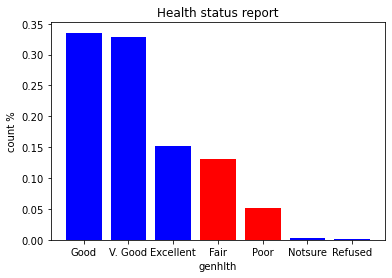

In [143]:
genhlth_dict = dict(df_IN_Health['genhlth'].value_counts()/len(df_IN_Health))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if ((xi == 'Fair') or (xi == 'Poor')) else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Health status report')

# Show the plot
plt.show()

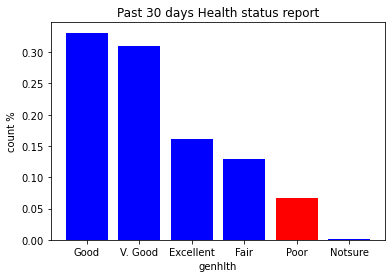

In [160]:
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['genhlth'].value_counts()/len(df_IN_Health_30))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if (xi == 'Poor') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Past 30 days Health status report')

# Show the plot
plt.show()

### 2. Average number of physically unhealthy days reported in past 30 days (age-adjusted).

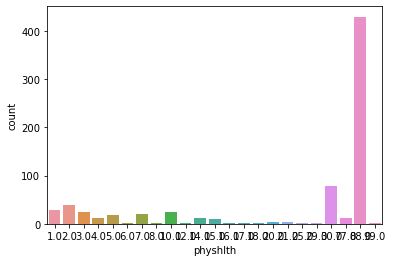

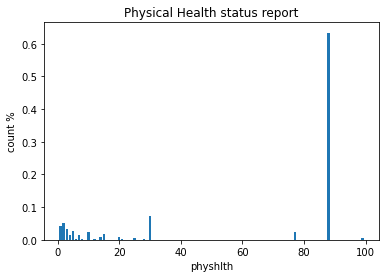

In [193]:
# physhlth - Poor physical health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['physhlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''


genhlth_dict = dict(df_IN_Health['physhlth'].value_counts()/len(df_IN_Health))


import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values)

# Set the labels and title
ax.set_xlabel('physhlth')
ax.set_ylabel('count %')
ax.set_title('Physical Health status report')

# Show the plot
plt.show()

### 4. Poor mental health days: Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

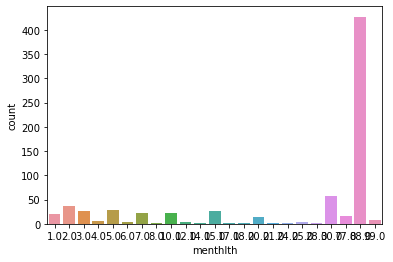

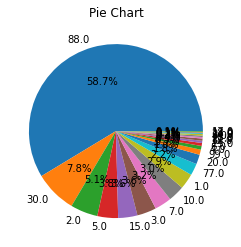

In [194]:
# menthlth - Poor mental health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['menthlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="menthlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(values, labels=names, autopct='%1.1f%%')

# Set the title
ax.set_title('Pie Chart')

# Show the plot
plt.show()

### 4. Percentage of adults who are current smokers (age-adjusted).

In [77]:
# sns.countplot(data=df_IN_Health, x="x.smoker3")

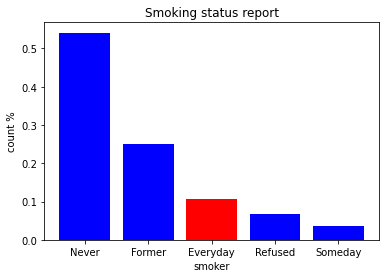

In [183]:
genhlth_dict = dict(df_IN_Health['x.smoker3'].value_counts()/len(df_IN_Health))
genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

# plt.bar(range(len(new_dict)), values, tick_label=names)
# plt.xlabel('smoker')
# plt.ylabel('count (%)')
# plt.title('Smoking status report')
# plt.show()


colors = ['red' if (xi == 'Everyday') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('smoker')
ax.set_ylabel('count %')
ax.set_title('Smoking status report')

# Show the plot
plt.show()

### 5. Physical inactivity

'\n1: Yes\n2: No\n7: Not sure\n9: Refused\n'

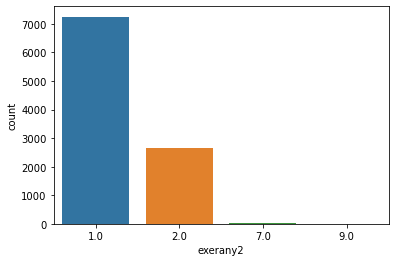

In [190]:
# exerany2
sns.countplot(data=df_IN_Health, x="exerany2")

'''
1: Yes
2: No
7: Not sure
9: Refused
'''

### Weight Factor ~ 6.8 M

In [98]:
# weight features

print(df_Indiana[['x.llcpwt2']].sum())
print(df_Indiana[['x.llcpwt']].sum())
print(df_Indiana[['x.cllcpwt']].sum())

total=(1565837+5262173)
print('\nLLCPWT ~6.8 M:', total)

x.llcpwt2    5262173.0
dtype: float64
x.llcpwt    5262173.0
dtype: float64
x.cllcpwt    1565837.0
dtype: float64

LLCPWT ~6.8 M: 6828010
